In [1]:
import ares
import numpy as np
import matplotlib.pyplot as pl
import distpy

My first try at fitting

In [2]:
# Independent variables
redshifts = np.array([3, 3.8, 4, 4.9, 5, 5.9, 6, 6.9, 7, 7.9, 8])
MUV = np.arange(-28, -8.8, 0.2)

# blob 1: the LF. Give it a name, and the function needed to calculate it.
blob_n1 = ['galaxy_lf']
blob_i1 = [('z', redshifts), ('x', MUV)]
blob_f1 = ['LuminosityFunction']

In [3]:
blob_pars = \
{
 'blob_names': [blob_n1],
 'blob_ivars': [blob_i1],
 'blob_funcs': [blob_f1],
 'blob_kwargs': [None],
}

In [4]:
#define the parameters that remain unchanged
base_pars = ares.util.ParameterBundle('emma:model1')
base_pars.update(blob_pars)

# This is important!
base_pars['pop_calib_lum'] = None

In [5]:
free_pars = \
  [
   'pq_func_par0[4]', #this is the constant
   'pq_func_par1[4]', #offset
   'pq_func_par2[4]', #slope
  ]

is_log = [False]#, False, False]

from distpy.distribution import UniformDistribution
from distpy.distribution import DistributionSet

ps = DistributionSet()
ps.add_distribution(UniformDistribution(0, 1), 'pq_func_par0[4]')
ps.add_distribution(UniformDistribution(0, 1),  'pq_func_par1[4]')
ps.add_distribution(UniformDistribution(0, 1),   'pq_func_par2[4]')

In [6]:
guesses = \
{
 'pq_func_par0[4]': 3e-4,
 'pq_func_par1[4]': 0,
 'pq_func_par2[4]': 0,
}


In [7]:
# Initialize a fitter object and give it the data to be fit
fitter_lf = ares.inference.FitGalaxyPopulation(**base_pars)

# The data can also be provided more explicitly
#I seem to need this or else the run throws error: Must set data by hand! 
# fitter_lf.redshifts = {‘lf’: [5.9]}
fitter_lf.data = 'bouwens2015', 'bouwens2017'

# print(fitter_lf.data)

In [8]:
fitter = ares.inference.ModelFit(**base_pars)
fitter.add_fitter(fitter_lf)

# Establish the object to which we'll pass parameters
from ares.populations.GalaxyHOD import GalaxyHOD
fitter.simulator = GalaxyHOD

In [ ]:
fitter.save_hmf = True  # cache HMF for a speed-up!
fitter.save_psm = True  # cache source SED model (e.g., BPASS, S99)

# Setting this flag to False will make ARES generate new files for each checkpoint.
# 2-D blobs can get large, so this allows us to just download a single
# snapshot or two if we'd like (useful if running on remote machine)
fitter.checkpoint_append = False

fitter.parameters = free_pars
# fitter.is_log = is_log
fitter.prior_set = ps

# In general, the more the merrier (~hundreds)
fitter.nwalkers = 200

fitter.jitter = [0.01] * len(fitter.parameters)
fitter.guesses = guesses

In [ ]:
# Run the thing
fitter.run('MCMC_files/lf_run1_07_08', burn=20, steps=100, save_freq=4, clobber=True)

In [14]:
anl = ares.analysis.ModelSet('MCMC_files/saved/LF/lf_run1_07_08')

labels = {
    'pq_func_par0[4]': r'const', #this is the constant
   'pq_func_par1[4]': 'offset',
   'pq_func_par2[4]': 'slope'
}

anl.custom_labels = labels
# anl.custom_labels


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : MCMC_files/saved/LF/                                                                   ####
#### prefix      : lf_run1_07_08                                                                          ####
#### N-d         : 3                                                                                      ####


# Loading MCMC_files/saved/LF/lf_run1_07_08.dd*.chain.pkl...
# Loaded MCMC_files/saved/LF/lf_run1_07_08.dd*.chain.pkl in 0.23 s.
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0000.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0001.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0002.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0003.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0004.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0005.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0006.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0007.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0008.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0009.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0010.blob_2d.galaxy_lf.pkl
# Loaded MCMC_files/saved/LF\lf_run1_07_08.dd0011.blob_2d.galaxy_lf.pkl
# Loade

C:\Users\Emma\Anaconda3\lib\site-packages\numpy\ma\core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


# WARNING: finkelstein2015 wavelength=1500.0A, not 1600A!


C:\Users\Emma\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Emma\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


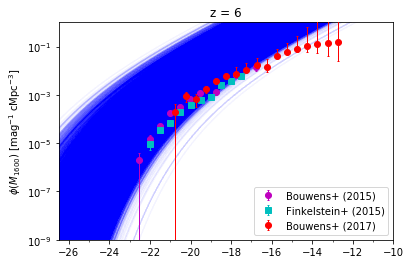

In [15]:
gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_lf', ivar=[6, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotLF(6, ax=ax, round_z=0.2)
ax.set_title("z = 6")

ax.set_ylim(1e-9, 1)
ax.legend()
pl.show()

0 of 20000 chain elements ignored because of chain links with inf's/nan's.


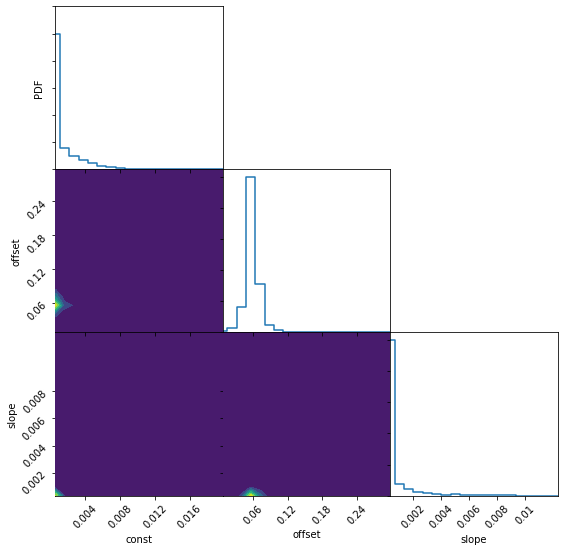

In [16]:
z = 6
# free_pars

ax = anl.TrianglePlot(pars=free_pars, ivar=[z, None, None])
# anl.set_axis_labels(pars=free_pars, ax=ax)
# anl.TrianglePlot(pars='pq_func_par0[4]', ivar=z)

#, label_panels=free_pars)

# (pars=params, ivar=[z, None, None, None, None, None, None, None], \
#                  label_panels=params

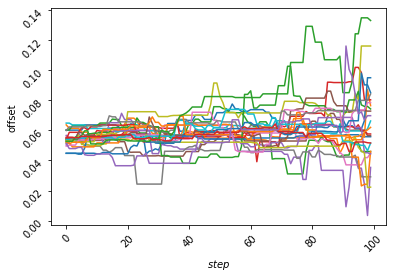

In [16]:
anl.WalkerTrajectories('pq_func_par1[4]', N=25)

['pq_func_par0[4]', 'pq_func_par1[4]', 'pq_func_par2[4]']


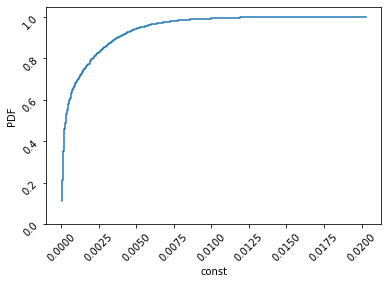

In [17]:
print(free_pars)

# p = anl.PosteriorPDF(free_pars)
# print(p)

anl.PosteriorCDF('pq_func_par0[4]')


In [18]:
covar = anl.CovarianceMatrix(free_pars)

if len(covar[0]) == 1:
    print("{}: {}".format(free_pars[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(free_pars[i], covar[0][i]))
        
fit_mean = np.array(covar[0])

pq_func_par0[4]: 1.228413e-03
pq_func_par1[4]: 5.929662e-02
pq_func_par2[4]: 4.808950e-04


In [19]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[free_pars[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [20]:
fit_best_like = anl.max_likelihood_parameters()

for i in range(len(covar[0])):
    print(anl.get_1d_error(free_pars[i])) #(maximum likelihood value, positive error, negative error).

# print(fit_best_like)

(1.5235660972570892e-06, array([ 2.64974735e-03, -5.79279048e-05]))
(0.13494122457280608, array([-0.06699553,  0.0847403 ]))
(6.69191304992888e-05, array([6.29212318e-04, 3.16012939e-05]))


In [21]:
pars_best = ares.util.ParameterBundle("emma:model1")

pars_best.update(fit_best_like)
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)


# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# WARNING: finkelstein2015 wavelength=1500.0A, not 1600.0A!
# WARNING: weisz2014 wavelength=1700.0A, not 1600.0A!
# WARNING: vanderburg2010 wavelength=1500.0A, not 1600.0A!


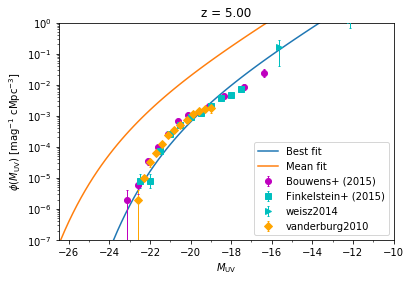

In [22]:
z = 5

ls_best = pop_best.LuminosityFunction(z, MUV)
ls_mean = pop_mean.LuminosityFunction(z, MUV)

obslf = ares.analysis.GalaxyPopulation()
obslf.Plot(z=z, round_z=0.2)

pl.semilogy(MUV, ls_best, label='Best fit')
pl.semilogy(MUV, ls_mean, label='Mean fit')
pl.title("z = %.2f" %z)
pl.legend()
pl.show()